In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pp

C:\Users\haho6\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


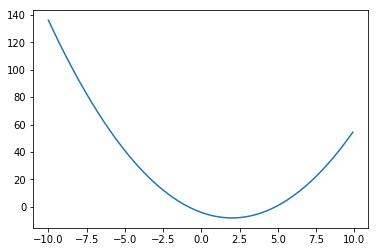

In [2]:
X_ = np.arange(-10,10,0.1)
Y_ = X_ ** 2 - 4 + X_*(-4)
pp.plot(X_,Y_)
pp.show()

In [94]:
data = tf.placeholder('float32', name='XD')
ravel = tf.placeholder('float32', name='YD')
W = tf.Variable(tf.random_uniform([1],-3,3))
b = tf.Variable(tf.random_uniform([1],-3,3))

hypothesis = W * data + b
loss = tf.reduce_mean(tf.square(hypothesis - ravel))

opti = tf.train.AdamOptimizer(learning_rate=0.2)
train_op = opti.minimize(loss)

In [95]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(1000):
        _,loss_value = sess.run([train_op, loss],feed_dict={data:X_, ravel:Y_})
        
    X = np.arange(-15,15,1)
    Y = sess.run(hypothesis,feed_dict={data:X})

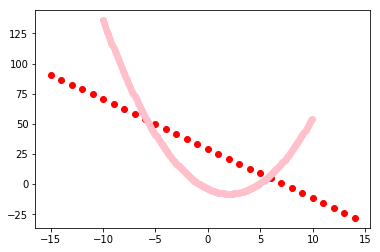

In [96]:
pp.plot(X,Y,'ro')
pp.plot(X_,Y_,'ro',color="pink")
pp.show()

In [97]:
x = tf.placeholder(tf.float32, shape=[None, 1])
y = tf.placeholder(tf.float32, shape=[None, 1])
W1 = tf.Variable(tf.random_normal([1,10]))
b1 = tf.Variable(tf.random_normal([10]))
L1 = tf.nn.relu(W1 * x + b1)

W2 = tf.Variable(tf.random_normal([10,120]))
b2 = tf.Variable(tf.random_normal([120]))
L2 = tf.nn.relu(tf.matmul(L1 , W2) + b2)

W3 = tf.Variable(tf.random_normal([120,122]))
b3 = tf.Variable(tf.random_normal([122]))
L3 = tf.nn.relu(tf.matmul(L2 , W3) + b3)

W4 = tf.Variable(tf.random_normal([122,120]))
b4 = tf.Variable(tf.random_normal([120]))
L4 = tf.nn.relu(tf.matmul(L3 , W4) + b4)

W5 = tf.Variable(tf.random_normal([120,200]))
b5 = tf.Variable(tf.random_normal([200]))
L5 = tf.nn.relu(tf.matmul(L4 , W5) + b5)

W6 = tf.Variable(tf.random_normal([200,120]))
b6 = tf.Variable(tf.random_normal([120]))
L6 = tf.nn.relu(tf.matmul(L5 , W6) + b6)

W7 = tf.Variable(tf.random_normal([120,120]))
b7 = tf.Variable(tf.random_normal([120]))
L7 = tf.nn.relu(tf.matmul(L6 , W7) + b7)

W8 = tf.Variable(tf.random_normal([120,200]))
b8 = tf.Variable(tf.random_normal([200]))
L8 = tf.nn.relu(tf.matmul(L7 , W8) )

W9 = tf.Variable(tf.random_normal([200,400]))
b9 = tf.Variable(tf.random_normal([400]))
L9 = tf.nn.relu(tf.matmul(L8 , W9) + b9)

W10 = tf.Variable(tf.random_normal([120,1]))
b10 = tf.Variable(tf.random_normal([1]))
L10 = tf.matmul(L4 , W10) + b10

model = L10


loss = tf.reduce_mean(tf.abs(model - y))
opti = tf.train.AdamOptimizer(learning_rate=0.1)
train_op = opti.minimize(loss)

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
X = np.arange(-15,10,0.1).reshape(-1,1)
f = (-X **2) + 3 + X * 2
for i in range(6000):
    _,s=sess.run([train_op,loss],feed_dict={x:X,y:f})
    print(s)


2609.2468
68939.13
23381.336
2797.3174
2555.2297
1424.9148
753.077
2431.9006
1992.3212
748.8617
1618.0896
2018.3892
1546.1923
664.85266
550.8095
783.3335
713.481
417.35706
36.065094
290.19135
379.057
317.3944
147.00244
61.25239
120.33652
102.29979
38.685394
63.987576
23.163479
55.186234
52.337452
12.674416
28.360653
34.545174
20.40424
19.196022
26.383224
17.033613
29.734856
18.935219
22.115294
29.875702
19.029402
25.000858
20.120115
28.56665
18.486193
19.908844
17.223772
22.715393
20.416655
10.409582
10.846816
18.340315
16.299942
10.711428
7.592409
13.181982
9.55138
12.290831
12.532453
11.913408
18.281975
18.94321
7.6866813
15.359417
17.169853
12.758703
10.664545
15.382444
15.388226
12.744615
4.997717
13.521431
10.646667
6.087296
16.963593
14.844657
14.59165
5.863278
16.021383
18.015274
12.113768
9.988778
12.678665
6.287653
11.113557
14.50415
8.424173
9.194232
13.889618
14.5166855
9.292239
7.77863
7.806981
8.834445
9.327799
10.110395
12.41884
4.217205
14.542572
15.74528
11.1776285
10.6

1.0297803
3.0818882
1.8857102
4.2744765
4.2619267
1.3999867
2.6251838
3.4723551
2.3530843
2.9922872
3.434062
2.3223302
1.3057792
3.8628879
2.9735918
2.599307
2.785785
2.1551704
2.1233728
2.2792122
2.5166848
2.7546835
1.7820507
3.3456657
2.3853943
3.9290676
3.8012989
1.7719698
1.4058255
3.0176947
2.8216848
3.1246974
2.5341394
3.879566
3.5526607
1.7175701
2.5318594
4.6836953
4.742016
1.1795981
6.281864
8.177361
5.3063493
1.741084
3.9849792
2.3108604
3.9584572
5.1351266
2.7965994
6.089051
6.1446004
2.8661077
5.3190985
5.760347
1.5760659
5.4835415
6.4390626
3.574582
3.7003338
4.4675508
1.803384
5.3494205
5.8805094
2.736451
4.570918
5.218929
1.8220874
5.448541
6.199578
3.6132555
3.9947748
4.7403746
1.8540606
4.883003
5.307767
1.9363649
4.8260617
5.49365
2.1661377
5.6209865
6.8689938
5.512719
2.2097993
4.3008776
1.5647336
4.5096016
5.2953663
2.0622687
5.5047493
6.92651
2.8486404
5.2905436
7.933755
6.1395764
1.3548654
4.4187794
3.3348923
2.4118457
3.1843848
2.0228827
1.5854449
2.331201
1.5277

1.962698
1.4883534
1.0131329
3.6988657
3.8430712
0.775788
4.492313
4.563087
2.1054058
5.316013
6.2474217
4.1737676
4.344945
5.620125
4.7869887
2.3988605
3.5174115
1.9128855
1.9279166
2.2513728
2.0302675
3.4457903
2.2889795
3.37298
3.7658896
1.9275701
1.6834892
2.2114954
1.7771237
2.5331328
1.8198601
3.6868193
2.9422593
2.1108036
2.4166145
2.0946295
1.8228886
2.5405564
2.6271758
1.5256034
1.3896013
2.7263668
2.1565986
2.3906012
1.9740647
2.6679258
2.867759
1.2600342
1.8139949
1.8439513
0.913164
4.0100794
3.6393697
1.4406604
1.5602883
2.8240213
2.621989
1.6218586
1.0664968
3.6875775
3.1656082
1.7733161
1.9640176
2.155611
1.5096358
3.1247065
3.1186063
0.9561974
1.8772956
1.6793097
0.68606037
1.2443162
1.8410176
0.9652818
4.0300226
4.553084
1.20147
5.4217787
7.2381425
6.7456875
3.3893352
4.0805
6.207874
4.538502
1.7976315
3.9155996
2.971089
1.486536
2.2640367
1.348217
1.0230349
2.9572597
2.6620612
2.226757
1.9611963
2.751412
2.4030428
2.3983338
2.315979
2.9278715
2.5345976
1.8595971
2.0818

3.1803687
3.3446012
3.3667443
1.2468865
2.2103262
0.8904835
1.163136
1.896056
0.6422515
2.2186728
0.58703834
0.759159
0.79528636
1.7585319
1.279369
0.9232286
1.7587935
0.9355156
0.74655896
2.0597782
0.93337536
3.8824236
4.279584
1.2172567
5.1288953
7.009389
6.3446765
2.7656288
5.005491
7.423266
6.03969
2.472358
4.791628
3.5926518
2.3944337
2.7434433
2.538726
2.5008023
1.7675709
1.2639439
2.8057387
2.8882942
1.2386353
1.1568928
2.4633253
0.8615336
1.9276934
1.6633381
0.78513694
2.649222
1.7066742
3.9278135
3.8758101
1.9470462
5.4224944
5.918998
3.7036963
4.737656
6.0966
3.70467
2.9177449
4.365533
1.2624153
4.7001376
5.831373
3.3827863
3.2085729
4.572971
1.3866729
4.6364865
6.0702667
3.8811457
2.434499
3.7303257
0.91266674
4.4253573
4.762636
1.6181484
5.2336736
6.4185014
3.9977336
3.7470703
5.4029264
3.188787
2.9152632
4.051162
1.2697551
1.9753691
1.2252829
1.5588576
2.3879006
0.7368084
2.5852742
0.64096594
3.3134873
2.5970976
2.5963418
2.9776576
1.0519205
0.85883665
2.6447403
1.7380706


1.6827133
2.165265
1.2307357
1.0986565
2.18115
1.2040073
3.4291065
3.5594723
0.80137014
3.464149
3.4004366
0.58502394
1.5260236
1.1425246
0.5787135
1.1782757
1.895712
0.47650284
3.263127
2.7407804
1.4550703
1.3833266
3.9163344
3.3873756
1.2033622
1.4353473
2.7582428
3.126199
2.7837732
2.511981
2.2036095
2.7882338
3.4397452
2.4923906
2.8703797
4.1142073
1.7974781
4.570027
3.676965
1.3412077
2.4311461
1.5108035
0.9014271
2.8134034
1.1802112
3.2115388
2.9625156
1.7014853
2.2616436
1.388011
0.59274477
3.0586934
1.9196824
3.4533544
3.696234
1.0484365
2.0203466
2.958851
2.2784028
2.1471138
2.863533
2.0797317
1.2531313
2.9995298
2.7688646
3.1185122
2.6686664
1.6394303
1.7375641
3.9135711
2.6153336
2.3132086
2.5434635
2.7665596
1.8149091
2.626141
2.9708374
0.75168407
2.312097
0.67421496
3.2487981
3.358757
0.58743805
4.259699
4.646981
1.3816392
5.5270243
7.671684
6.8824396
3.4238088
4.1661544
6.9195614
4.9156747
1.1364143
3.0127766
1.3873986
3.8220894
4.460447
1.2998053
4.8018517
6.4350653
5.21

1.7569307
0.62662303
3.4740167
3.3095522
1.1299682
5.4905515
5.300804
2.412241
5.8893523
7.8427157
6.2967405
1.8417735
6.215107
8.451835
5.616718
1.7518893
6.498333
7.7263465
5.6279263
1.4415236
3.6855364
2.5684292
4.0558786
5.157368
3.7034636
1.7765456
2.7859395
0.6672118
0.99304336
3.051076
2.3294086
2.5946822
2.7149749
1.4801387
1.4833567
2.2875803
1.6504443
3.2903721
3.2351606
1.3194075
1.4972029
2.4054978
1.8560845
2.5173612
2.7050846
0.8253269
1.5007433
1.2159303
1.198871
0.7761452
0.6123512
0.91317964
1.8640777
1.1352178
3.3411014
2.3372326
2.3224645
2.964296
2.219819
1.488503
2.8526986
2.3385649
3.407541
4.403333
1.2255656
4.861043
6.0696125
4.846085
1.5566298
5.2494206
5.426314
2.9944148
5.2928076
6.600573
4.7670007
1.9129673
5.429154
5.0945683
1.5679103
5.9644046
7.790506
6.3650436
2.046878
6.462346
9.189545
6.8036523
1.4103785
6.030785
7.701922
6.1962695
1.8224727
4.4473987
4.232402
1.1913391
4.703598
4.7461286
1.4464067
5.9404855
7.5483866
5.1081085
2.4724555
3.6860926
1.42

1.3665683
0.59822863
0.5888884
0.6422458
2.0229466
1.0994946
2.656163
3.1823168
1.0259043
4.2105017
5.6776676
3.7881937
1.231011
2.9134681
1.7493706
4.340067
4.031581
2.2879815
5.578112
6.0893264
5.625688
1.9003463
5.7780275
8.323164
6.252738
1.679541
4.7783046
5.713637
3.558194
3.571298
5.321919
3.716391
2.0554414
3.560998
1.8237938
3.7672522
4.2122574
1.7732524
4.3789225
5.3345284
3.5185308
1.8029814
2.9510357
1.0158345
3.232421
2.9159966
1.3163733
1.9882134
1.3647666
0.7564198
0.9822275
0.94373363
1.4289716
0.79898465
2.1277905
1.625144
3.1922672
2.6680477
2.1438596
2.1909153
2.7458632
2.4984221
1.441441
1.4547359
1.7764525
1.4168315
2.2056413
1.8951384
2.2355
1.1187698
3.4828057
3.9562812
1.2958553
3.6306667
3.7183776
0.72570854
3.453966
3.0537717
0.9789531
3.596602
3.2715
1.239072
3.7724895
3.2055826
1.3743709
3.9978027
3.4089696
1.5806367
5.1344438
5.763392
3.3122895
3.0042765
4.5360546
1.9515616
4.240868
5.928668
4.1840124
1.1662407
3.1124065
1.0985585
3.592775
4.197201
1.424605

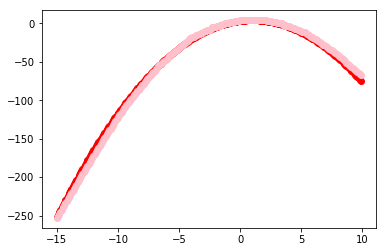

In [98]:
Y = sess.run(model,feed_dict={x:X})
pp.plot(X,f,'ro')
pp.plot(X,Y,'ro',color="pink")
pp.show()